# Employee Turnover

In this we are going to implement a model which will help us to predict whether a employee resign or not, by considering some factors

## Analyze Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
emp_df=pd.read_csv("Employee_turnover.csv")
emp_df.head() ##Analyze dataset

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,4,157,3,0,1,0,sales,medium
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
emp_df.isnull().sum()     ##No null or missing values

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

## Data Visualization

In [2]:
import matplotlib.pyplot as plt
%matplotlib notebook

quit=len(emp_df[emp_df['left']==1])
stayed=len(emp_df[emp_df['left']==0])
print("No of Employees Quit:",quit)
print("No of Employees Stayed:",stayed)

No of Employees Quit: 3571
No of Employees Stayed: 11428


<IPython.core.display.Javascript object>


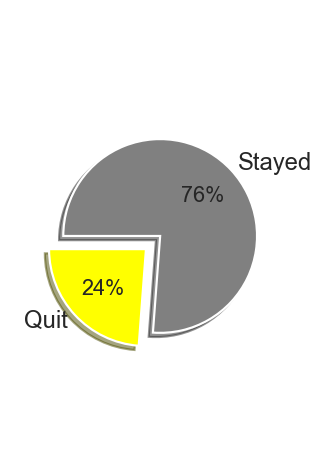

([<matplotlib.patches.Wedge at 0x1935167cc88>,
 [Text(-0.9530026979449575, -0.8841865514186655, 'Quit'),
  Text(0.8063868632373208, 0.7481578889501032, 'Stayed')],
 [Text(-0.5864631987353583, -0.544114800873025, '24%'),
  Text(0.43984737994762946, 0.40808612124551075, '76%')])

In [70]:
label=['Quit','Stayed']
val=[quit,stayed]
ex=[0.2,0]
color=['yellow','grey']
fig,ax=plt.subplots()
plt.rcParams['figure.figsize']=(2,3)
ax.pie(val,labels=label,explode=ex,shadow=True,startangle=180,autopct='%1.0f%%',colors=color)

####  Relation between salary amount  and no. of employees left

<IPython.core.display.Javascript object>


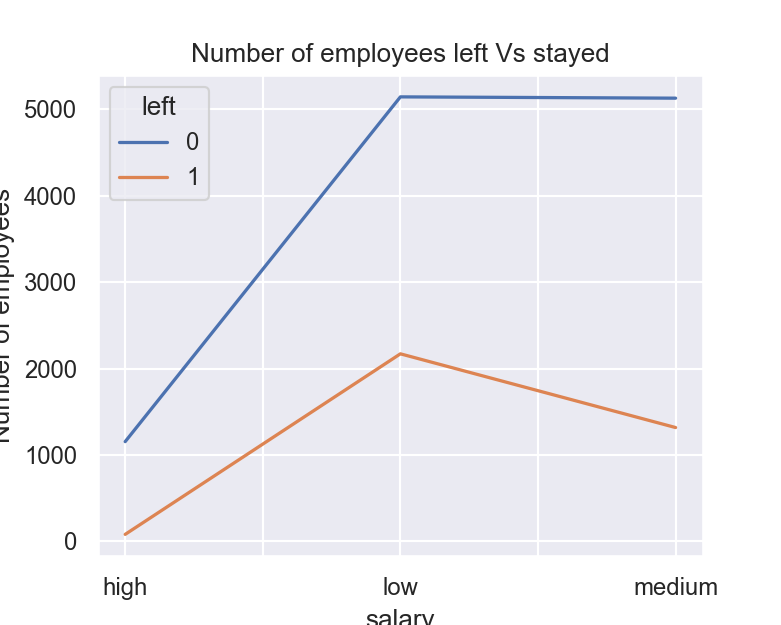

Text(0.5, 1.0, 'Number of employees left Vs stayed')

In [8]:

plt.rcParams['figure.figsize']=(5,4)
pd.crosstab(emp_df.salary,emp_df.left).plot()
plt.ylabel("Number of employees")
plt.title("Number of employees left Vs stayed")
#plt.legend()

#### Bar Plot

<IPython.core.display.Javascript object>


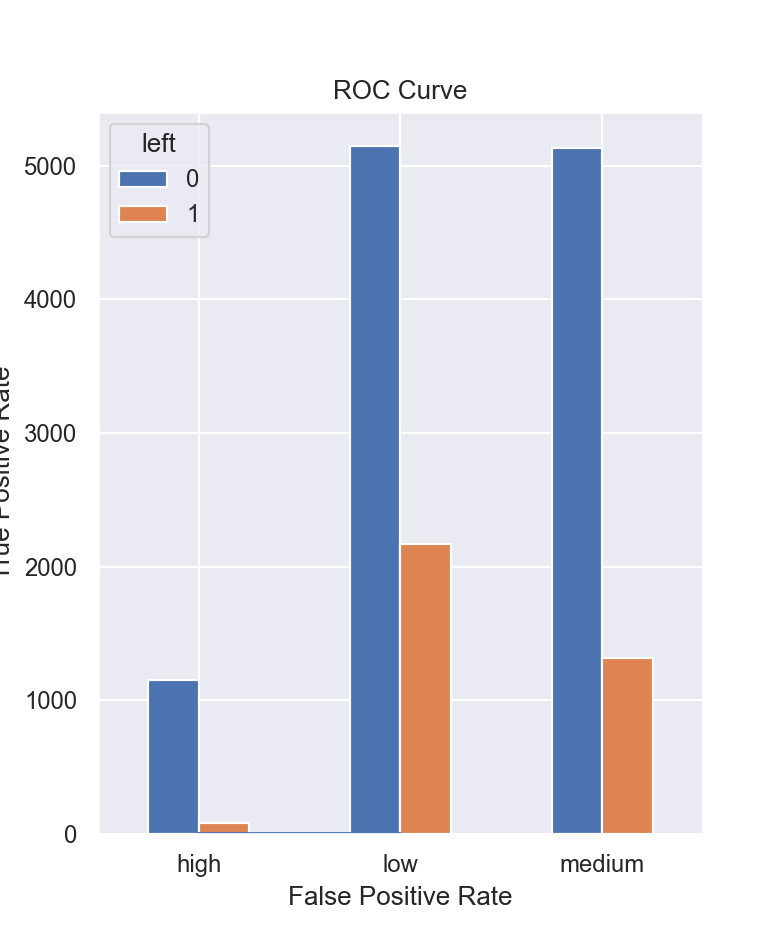

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

In [86]:
pd.crosstab(emp_df.salary,emp_df.left).plot(kind='bar')
plt.ylabel("Number of employees")
plt.xlabel("Salary Amount")
plt.xticks(rotation=360)

#### No of Employees left  Vs No of employees stayed for different departments

<IPython.core.display.Javascript object>


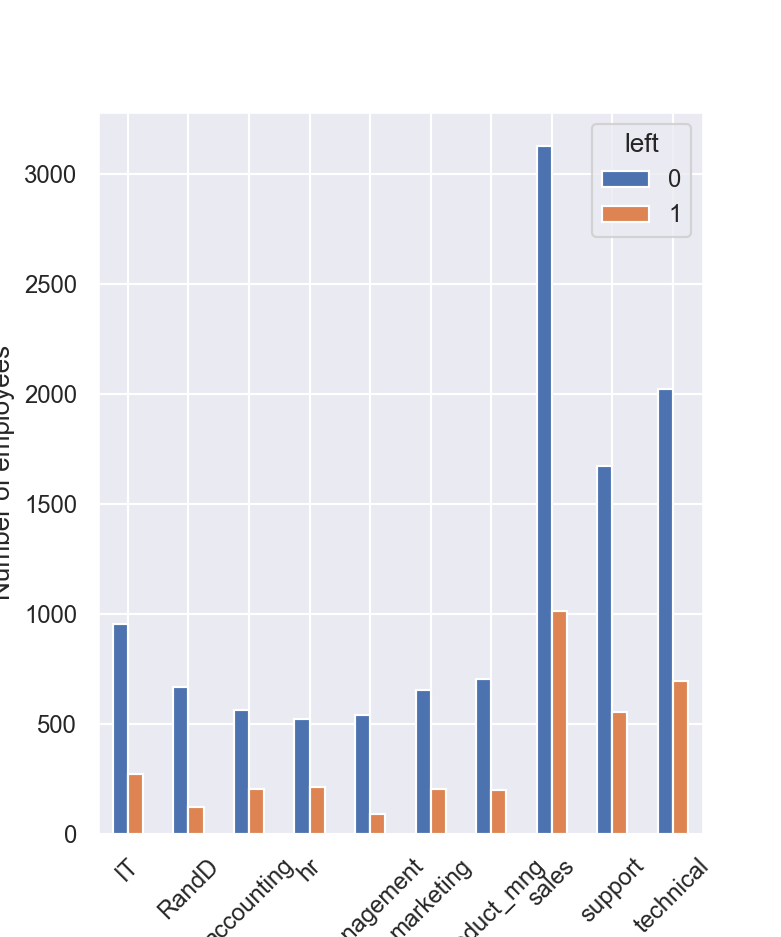

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

In [87]:
pd.crosstab(emp_df.Department,emp_df.left).plot(kind='bar')
plt.ylabel("Number of employees")
plt.xlabel("Salary Amount")
plt.xticks(rotation=45)


In [74]:
emp_df.Department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

<IPython.core.display.Javascript object>


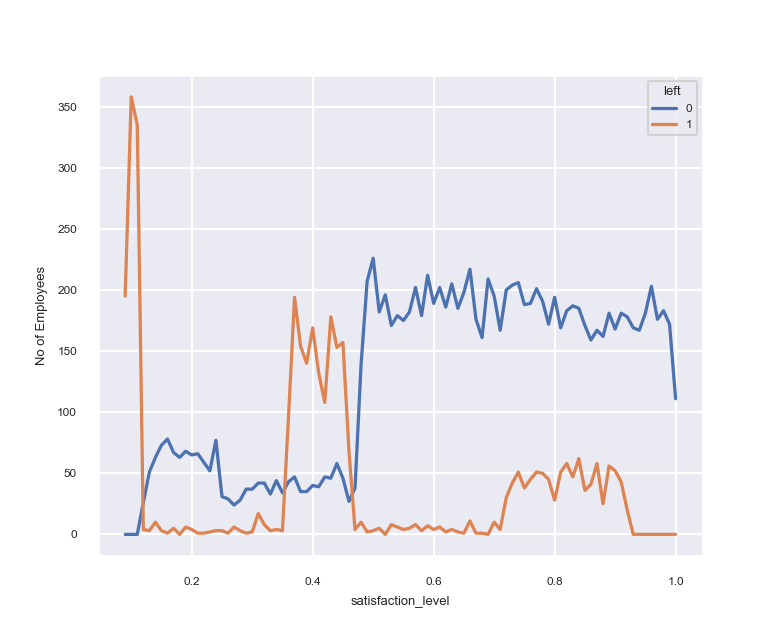

Text(0, 0.5, 'No of Employees')

In [205]:
pd.crosstab(emp_df.satisfaction_level,emp_df.left).plot()
plt.rcParams['figure.figsize']=(3,4)
plt.ylabel("No of Employees")


In [72]:
pd.crosstab(emp_df.satisfaction_level,emp_df.left).head(7)

left,0,1
satisfaction_level,,
0.09,0,195
0.10,0,358
0.11,0,335
0.12,26,4
0.13,51,3
0.14,63,10
0.15,73,3


Count of people with satisfaction level less than 0.2 who left is more

In [73]:
cols=emp_df.columns
cols

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [43]:
from sklearn.model_selection import train_test_split
x_cols=['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours', 'time_spend_company', 'Work_accident', 
         'promotion_last_5years', 'Department', 'salary']
x=emp_df[x_cols]
x=pd.get_dummies(x)
y=emp_df['left']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)


### Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,max_depth=12,random_state=0) 
rfc.fit(x_train,y_train)
print("Test Score ",rfc.score(x_test,y_test))
print("Train Score",rfc.score(x_train,y_train))

Test Score  0.9821333333333333
Train Score 0.9879989332385101


### Dummy classifier

#### To check whether our random forest classifier is doing better than dummy classifier

In [96]:
from sklearn.dummy import DummyClassifier
dc=DummyClassifier(strategy="most_frequent",random_state=0)
dc.fit(x_train,y_train)
print("test",dc.score(x_test,y_test))
print("train",dc.score(x_train,y_train))

test 0.7682666666666667
train 0.7598008711885501


### Support Vector Classifier

In [56]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
svc=SVC(C=10,gamma=0.1,random_state=0)
svc.fit(x_train,y_train)
print("train Score SVC",svc.score(x_train,y_train))
print("test Score SVC",svc.score(x_test,y_test))
y_pred=svc.decision_function(x_test)
score=roc_auc_score(y_test,y_pred.reshape(-1,1))


train Score SVC 0.9890656947284203
test Score SVC 0.9714666666666667


### Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=0,max_iter=10000,C=0.1)
logreg.fit(x_train,y_train)
print("Train  Accuracy Score ",logreg.score(x_train,y_train))
print("Test  Accuracy Score ",logreg.score(x_test,y_test))

Train  Accuracy Score  0.7832696239665748
Test  Accuracy Score  0.7826666666666666


Logistic Regression model is doing slightly better than dummy classifier .Also
Accuracy score of logreg model is is less as compare to other two models

In [48]:
from sklearn.model_selection import GridSearchCV

#### Grid Search to find best parameters( rfc model)

In [110]:
gs=GridSearchCV(estimator=rfc,param_grid={'n_estimators':[50,100,150,200],'max_depth':[5,10,12]},scoring="roc_auc")
gs.fit(x_train,y_train)
gs.best_params_

{'max_depth': 12, 'n_estimators': 100}

In [112]:
print("roc _auc score RFC  ",gs.best_score_)

roc _auc score RFC   0.9916715454861867


In [66]:
y_prob=rfc.predict_proba(x_test)
score_rfc=roc_auc_score(y_test,y_prob[:,1])
print("roc_auc score SVC",score)
print("roc_auc score RFC",score_rfc)

roc_auc score SVC 0.9843085266790995
roc_auc score RFC 0.993570030863692


In [101]:
#list(y_prob[:,1].reshape(-1,1))

#### Grid Search to find best parameters (svc model)

In [98]:
gs2=GridSearchCV(estimator=svc,param_grid={'C':[0.1,1,10,100],'gamma':[0.001,0.01,0.1,1]},scoring='roc_auc')
gs2.fit(x_train,y_train)
gs2.best_params_

{'C': 100, 'gamma': 1}

In [108]:
gs2.best_score_ 
print("roc_auc score (svc model) when C:100 and gamma:1",gs2.best_score_)


roc_auc score (svc model) when C:100 and gamma:1 0.9823190138211231


#### Grid Search to find best parameters (Log reg model)

In [63]:
gs3=GridSearchCV(estimator=logreg,param_grid={'C':[0.1,1,10,100]},scoring='roc_auc')
gs3.fit(x_train,y_train)
gs3.best_params_

{'C': 0.1}

In [64]:
gs3.best_score_

0.8189475603744032

### Plot ROC Curve (rfc model)

<IPython.core.display.Javascript object>


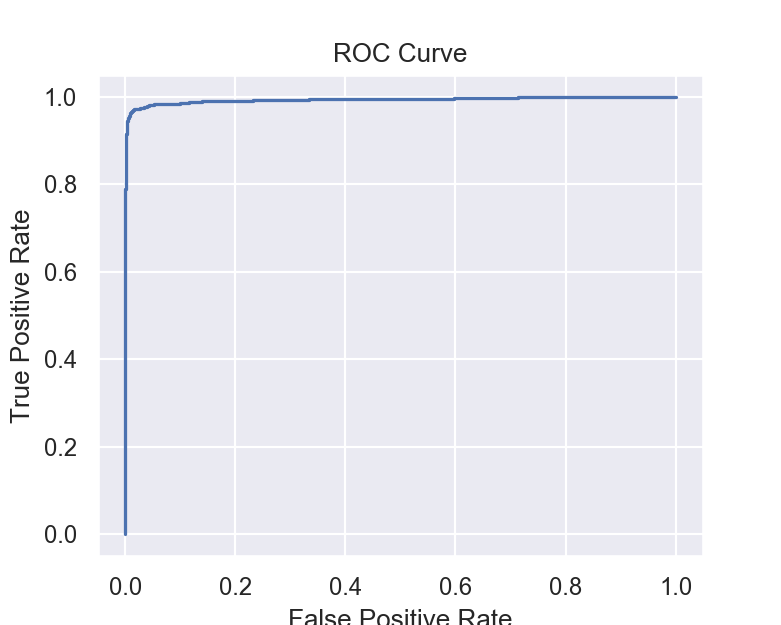

In [68]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold=roc_curve(y_test,y_prob[:,1])

plt.rcParams['figure.figsize']=(5,4)
plt.plot(fpr,tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

### Confusion Matrix

In [60]:
from sklearn.metrics import confusion_matrix
pred_rfc=rfc.predict(x_test)
pred_svc=svc.predict(x_test)
pred_logreg=logreg.predict(x_test)
cm_svc=confusion_matrix(y_test,pred_svc)
cm_rfc=confusion_matrix(y_test,pred_rfc)
cm_logreg=confusion_matrix(y_test,pred_logreg)
print("RFC \n",cm_rfc,"\n")
print("SVC \n",cm_svc,'\n')
print("LOG Reg \n",cm_logreg)

RFC 
 [[2872    9]
 [  58  811]] 

SVC 
 [[2818   63]
 [  44  825]] 

LOG Reg 
 [[2682  199]
 [ 616  253]]


Total misclassification for RFC model : 67
Total misclassification for SVC model:  107
Total misclassification of logreg model: 815

#### rfc model is better than other models